# Práctica 3
## Regresión lineal con BGD Y SGD

> Machine Learning and Artificial Intelligence - PhD Consuelo Varinia García Mendoza

> Daniel Armas Ramírez

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Regresiión lineal BGD monovariable

In [11]:
df = pd.read_csv('casas.csv')
df.head()

,Terreno (m2),Precio (MDP)
0,440.0,1.01
1,616.0,1.42
2,381.0,0.88
3,963.0,2.21
4,431.0,0.99


In [22]:
X = df['Terreno (m2)']
y = df['Precio (MDP)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7, test_size = 0.3, shuffle=True)

### BGD Monovariable

In [25]:
from typing import List

class BGD:
    def __init__(self, x: List[List[int]], y: List[int], w: List[float], alpha: float)->None:
        self.x = x
        self.y = y
        self.w = w
        self.alpha = alpha

    def BGD(self)->None:
        n = len(self.w)
        m = len(self.y)

        for i in range(n):

            sum_vec = []
            temp_array = []

            for j in range(m):
                temp_array.append((self.w[i] * self.x[i][j]) - self.y[j])

            for j in range(m):
                sum_vec.append(temp_array[j] * self.x[i][j])

            all_sum = sum(sum_vec)
            self.w[i] = self.w[i] - ((2*self.alpha) * all_sum)

    def predict(self, X_test):
        self.y_pred = []
        for xt in X_test:
            self.y_pred.append(self.w[0]*xt)

    def estimate_error(self, y_test):
        error = 0.0
        for i in range(len(y_test)):
            error += abs(self.y_pred[i] - y_test[i])
        return error

    def iteration(self, steps: int, X_test, y_test)->None:
        self.lines = []
        self.errors = []

        for i in range(steps):
            self.BGD()

            y_predic = []
            for xt in X_test:
                y_predic.append(self.w[0] * xt)

            self.lines.append(y_predic)

            error = 0.0
            for i in range(len(y_test)):
                error += abs(y_predic[i] - y_test[i])

            self.errors.append(error)

            print(f'Iteración {i+1}')
            print(f'Pesos: {self.w}')
            print(f'Predicciones: {y_predic}')
            print(f'Error de Estimación: {error}\n')

        fig, axs = plt.subplots(1, 2, figsize=(9, 6))
        colors = ['blue', 'red', 'green', 'purple']
        for i in range(len(self.lines)):
            axs[0].plot(X_test, self.lines[i], color=colors[i])
        
        axs[0].set_title('Regresión Lineal')
        axs[0].set_xlabel('Terreno (m2)')
        axs[0].set_ylabel('Precio (MDP)')

        it = [ i for i in range(len(self.errors)) ]
        axs[1].scatter(it, self.errors, color='red')
        axs[1].set_title('Error de estimación')
        axs[1].set_xlabel('Iteración')
        axs[1].set_ylabel('|y_pred - y_test|')
        plt.tight_layout()
        plt.show()


Iteración 3
Pesos: [0.0008143827999999999]
Predicciones: [0.3102798468, 0.5765830223999999, 0.35099898679999997]
Error de Estimación: 2.262138144

Iteración 3
Pesos: [0.00134054665030748]
Predicciones: [0.5107482737671498, 0.9491070284176958, 0.5777756062825239]
Error de Estimación: 1.4623690915326304

Iteración 3
Pesos: [0.0016804953788051745]
Predicciones: [0.6402687393247715, 1.1897907281940636, 0.7242935082650301]
Error de Estimación: 0.9456470242161347

Iteración 3
Pesos: [0.0019001325468463942]
Predicciones: [0.7239505003484762, 1.3452938431672472, 0.8189571276907959]
Error de Estimación: 0.6117985287934806



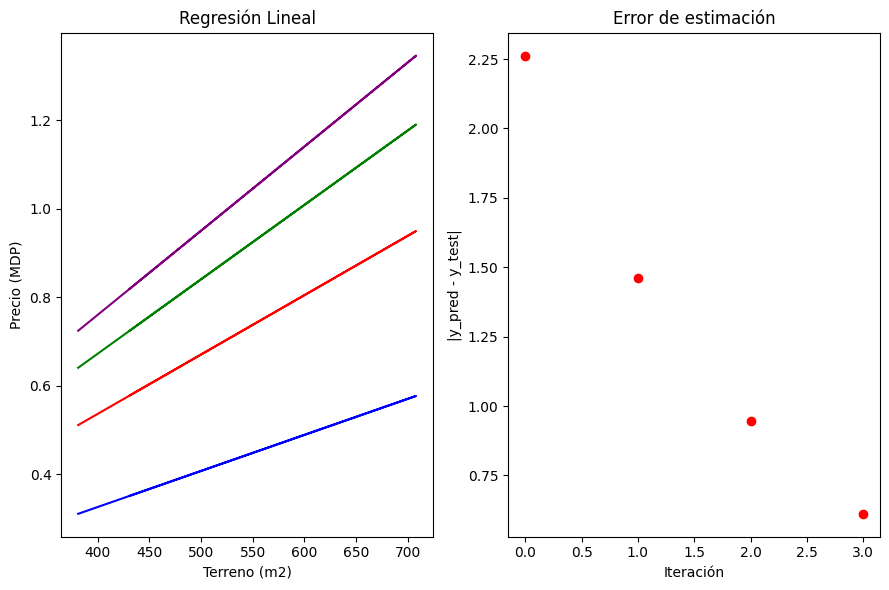

In [26]:
x_ = [X_train.to_list()]
y_ = y_train.to_list()

w = [ 0 ]
a = 0.00000007
bgd = BGD(x_, y_, w, a)
bgd.iteration(4, X_test.to_list(), y_test.to_list())

### BGD Multivariable

In [28]:
df2 = pd.read_csv('Dataset_multivariable.csv')
df2.head()

,x1,x2,x3,x4,x5,y
0,1.0,0.4,-12.0,12.0,10.2,11.6
1,1.0,0.6,-15.0,16.0,11.9,14.5
2,1.0,0.8,-18.0,20.0,13.6,17.4
3,1.0,1.0,-21.0,24.0,15.3,20.3
4,1.0,1.2,-24.0,28.0,17.0,23.2


In [29]:
X = df2[['x1', 'x2', 'x3', 'x4', 'x5']]
y = df2['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.7, test_size = 0.3, shuffle=True)

In [27]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features + 1)
        X = np.concatenate([np.ones((num_samples, 1)), X], axis=1)

        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.weights)
            error = y_pred - y
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)
            gradient = np.dot(X.T, error) / num_samples
            self.weights -= self.learning_rate * gradient
            print(self.weights)
    def predict(self, X):
        X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
        return np.dot(X, self.weights)

[ 0.00014666  0.00014666  0.00022023 -0.00418346  0.00499131  0.00286926]
[ 0.00029148  0.00029148  0.0004377  -0.00831443  0.00991998  0.00570254]
[ 0.00043449  0.00043449  0.00065244 -0.01239357  0.01478677  0.0085003 ]
[ 0.00057572  0.00057572  0.00086448 -0.01642152  0.01959248  0.01126298]


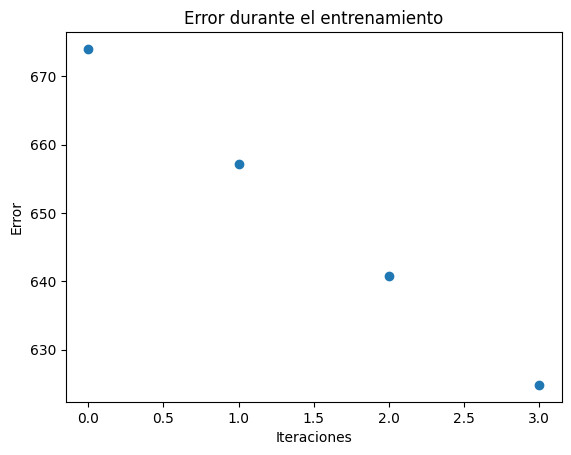

In [30]:
model = LinearRegression(learning_rate=0.000006, num_iterations=4)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
plt.scatter(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error durante el entrenamiento')
plt.show()

In [73]:
from typing import List

class BGD:
    def __init__(self, x: List[List[float]], y: List[float], w: List[float], alpha: float)->None:
        self.x = x
        self.y = y
        self.w = w
        self.alpha = alpha

    def BGD(self)->None:
        n = len(self.w)
        m = len(self.y)

        for i in range(n):

            sum_vec = []
            temp_array = []

            for j in range(m):
                temp_array.append((self.w[i] * self.x[j][i]) - self.y[j])

            for j in range(m):
                sum_vec.append(temp_array[j] * self.x[j][i])

            all_sum = sum(sum_vec)
            self.w[i] = self.w[i] - ((2*self.alpha) * all_sum)

    def iteration(self, steps: int, X_test, y_test)->None:
        self.errors = []
        for i in range(steps):
            self.BGD()

            y_predic = []
            for j in range(len(X_test)):
                predic = 0
                for i in range(len(X_test[0])):
                    predic += w[i] * X_test[j][i]
                y_predic.append(predic)

            error = 0.0
            for i in range(len(y_test)):
                error += abs(y_predic[i] - y_test[i])

            self.errors.append(error)

            print(f'Iteración {i+1}')
            print(f'Pesos: {self.w}')
            print('y_predic')
            print(y_predic)
            print()
            print('Error de estimación')
            print(error)
            print()

        plt.scatter([1, 2, 3, 4], self.errors)
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')
        plt.title('Error durante el entrenamiento')
        plt.show()


Iteración 3
Pesos: [0.0020532, 0.0030832800000000007, -0.0585684, 0.0698784, 0.040169640000000006]
y_predic
[3.002626128, 6.147369192, 4.050873816]

Error de estimación
62.199130864

Iteración 3
Pesos: [0.004106227531199999, 0.006166037569036801, -0.1135882577808, 0.13371930624, 0.07918998642996]
y_predic
[5.804997637888285, 11.873986734371123, 7.827994003382564]

Error de estimación
49.89302162435803

Iteración 3
Pesos: [0.006159082608087379, 0.009248272795631104, -0.1652745724183769, 0.19204435818086402, 0.11709392172821242]
y_predic
[8.421864503496346, 17.21132733235039, 11.351685446447695]

Error de estimación
38.415122717705565

Iteración 3
Pesos: [0.0082117652451483, 0.012329985768288613, -0.2138293166246923, 0.24533012563403736, 0.15391338753364653]
y_predic
[10.86682803624258, 22.18839128646908, 14.640682452984747]

Error de estimación
27.704098224303586



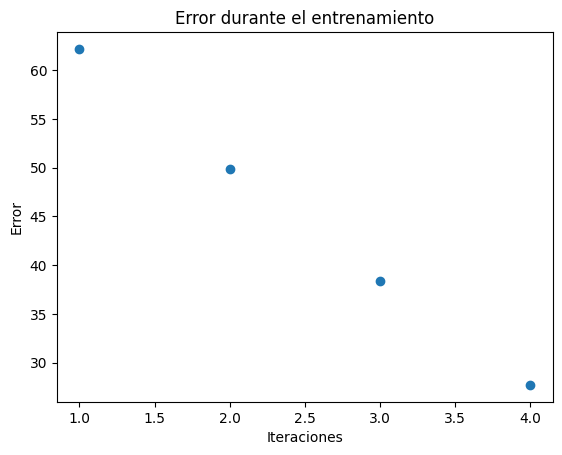

In [74]:
x_ = X_train.values.tolist()
y_ = y_train.tolist()

w = [ 0, 0, 0, 0, 0 ]
a = 0.000006
bgd = BGD(x_, y_, w, a)
bgd.iteration(4, X_test.values.tolist(), y_test.values.tolist())